In [7]:
!pip uninstall prophet
!pip install pystan==2.19.1.1 prophet


^C


In [1]:
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("we1377srv$.csv")

df['datetime'] = pd.to_datetime(df['time'])
df['timestamp'] = df["datetime"].values.astype(np.int64)/1000000000
df.to_csv('we1377srv$.csv', index=False)
df.tail(20)

,Unnamed: 0,time,Authorization Policy Change,Process Creation,Logon,Logoff,Process Termination,Sensitive Privilege Use,Special Logon,Removable Storage,File Share,File System,Detailed File Share,Security System Extension,Registry,Security Group Management,Other Logon/Logoff Events,Security State Change,timestamp,datetime
604,604,2016-08-28 15:24:23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.472398e+09,2016-08-28 15:24:23
605,605,2016-08-28 15:39:01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.472399e+09,2016-08-28 15:39:01
606,606,2016-08-28 15:46:02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.472399e+09,2016-08-28 15:46:02
607,607,2016-08-28 15:54:03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.472400e+09,2016-08-28 15:54:03
608,608,2016-08-28 15:55:47,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.472400e+09,2016-08-28 15:55:47
609,609,2016-08-28 16:25:13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.472402e+09,2016-08-28 16:25:13
610,610,2016-08-28 16:35:51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.472402e+09,2016-08-28 16:35:51
611,611,2016-08-28 16:40:29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.472402e+09,2016-08-28 16:40:29
612,612,2016-08-28 16:49:06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.472403e+09,2016-08-28 16:49:06
613,613,2016-08-28 16:56:33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.472403e+09,2016-08-28 16:56:33


In [3]:
Event = pd.read_csv("we1377srv$.csv")

times = Event['timestamp']

In [74]:
from datetime import datetime

frames=0
start_time=times[0]
end_time=start_time + (1*60*60)
event_log={}

for time in times:
    current_time=time
    
    
    if current_time < end_time and start_time in event_log:
        event_log[start_time]=event_log[start_time]+1
    elif current_time < end_time:
        event_log[start_time]=1
    else:
        start_time = current_time
        end_time=start_time + (1*60*60)
        event_log[start_time]=1

        
time=[]
counts=[]
for key,value in event_log.items():
    time.append(datetime.fromtimestamp(key))
    counts.append(value)

# importing the module
# print(event_log)    
dict = {'ds': time, 'y': counts, 'y1': counts, 'y2': counts, 'y3': counts,}
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('time.csv') 


In [173]:
df = pd.read_csv('time.csv')
df1 = pd.read_csv('time.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
cols = ['y', 'y1', 'y2', 'y3']

df1['y'] = df1[cols].mean(axis=1)

df1.drop(['Unnamed: 0', 'y1', 'y2', 'y3'], axis = 1, inplace = True)
df1

,ds,y
0,2016-08-25 23:46:20,14.0
1,2016-08-26 00:56:25,14.0
2,2016-08-26 02:00:36,11.0
3,2016-08-26 03:08:39,7.0
4,2016-08-26 04:14:58,12.0
...,...,...
59,2016-08-28 17:44:44,8.0
60,2016-08-28 18:45:44,6.0
61,2016-08-28 19:54:24,8.0
62,2016-08-28 20:55:47,5.0


In [174]:
# Add seasonality
model = Prophet(interval_width=0.99)

# Fit the model on the training dataset
model.fit(df1)

08:37:13 - cmdstanpy - INFO - Chain [1] start processing
08:37:13 - cmdstanpy - INFO - Chain [1] done processing


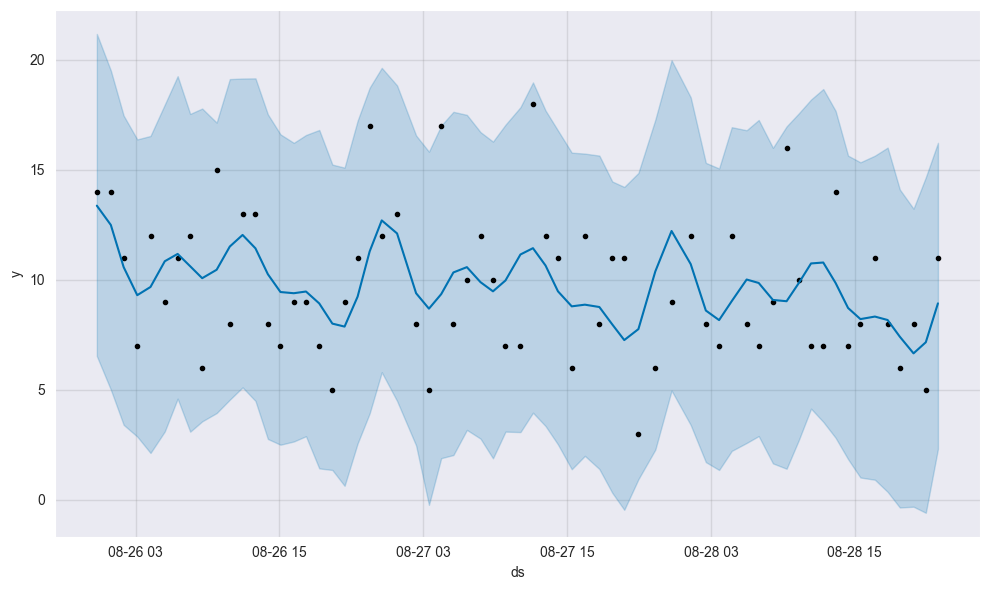

In [175]:
forecast = model.predict(df1)

# Visualize the forecast
model.plot(forecast); # 

In [176]:
df1.tail(20)

# df['ds']=df['ds'].astype(str)

,ds,y
44,2016-08-28 01:18:55,12.0
45,2016-08-28 02:34:46,8.0
46,2016-08-28 03:41:08,7.0
47,2016-08-28 04:44:34,12.0
48,2016-08-28 05:59:02,8.0
49,2016-08-28 06:59:21,7.0
50,2016-08-28 08:10:35,9.0
51,2016-08-28 09:18:59,16.0
52,2016-08-28 10:19:42,10.0
53,2016-08-28 11:21:20,7.0


In [177]:
# Merge actual and predicted values

performance =pd.concat([df1, forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]],
                  axis = 1)
df =pd.concat([df, forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]],
                  axis = 1)
# performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
print(performance)

                     ds     y       yhat  yhat_lower  yhat_upper
0   2016-08-25 23:46:20  14.0  13.365880    6.530476   21.171985
1   2016-08-26 00:56:25  14.0  12.489493    5.004160   19.508520
2   2016-08-26 02:00:36  11.0  10.573296    3.403301   17.458605
3   2016-08-26 03:08:39   7.0   9.297774    2.871219   16.378484
4   2016-08-26 04:14:58  12.0   9.670693    2.125583   16.534665
..                  ...   ...        ...         ...         ...
59  2016-08-28 17:44:44   8.0   8.168766    0.357932   16.004779
60  2016-08-28 18:45:44   6.0   7.409941   -0.353015   14.099773
61  2016-08-28 19:54:24   8.0   6.653182   -0.317387   13.227733
62  2016-08-28 20:55:47   5.0   7.158077   -0.593219   14.654664
63  2016-08-28 21:56:33  11.0   8.926038    2.312785   16.222846

[64 rows x 5 columns]


In [178]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 2.314047155636606
The MAPE for the model is 0.2709360008137148


In [179]:
anom = []
for row in df.itertuples():
    if row[2] < row[7] or row[2] > row[8]:
        anom.append(1)
    elif row[3] < row[7] or row[3] > row[8]:
        anom.append(2)
    elif row[4] < row[7] or row[4] > row[8]:
        anom.append(3)
    elif row[5] < row[7] or row[5] > row[8]:
        anom.append(4)
    else:
        anom.append(0)
df['anomaly'] = anom
df

,ds,y,y1,y2,y3,yhat,yhat_lower,yhat_upper,anomaly
0,2016-08-25 23:46:20,14,14,14,14,13.365880,6.530476,21.171985,0
1,2016-08-26 00:56:25,14,14,14,14,12.489493,5.004160,19.508520,0
2,2016-08-26 02:00:36,11,11,11,11,10.573296,3.403301,17.458605,0
3,2016-08-26 03:08:39,7,7,7,7,9.297774,2.871219,16.378484,0
4,2016-08-26 04:14:58,12,12,12,12,9.670693,2.125583,16.534665,0
...,...,...,...,...,...,...,...,...,...
59,2016-08-28 17:44:44,8,8,8,8,8.168766,0.357932,16.004779,0
60,2016-08-28 18:45:44,6,6,6,6,7.409941,-0.353015,14.099773,0
61,2016-08-28 19:54:24,8,8,8,8,6.653182,-0.317387,13.227733,0
62,2016-08-28 20:55:47,5,5,5,5,7.158077,-0.593219,14.654664,0


In [180]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    64
Name: anomaly, dtype: int64

In [181]:
anomalies = df[df['anomaly']>0].sort_values(by='ds')
anom_performance = performance[performance['anomaly']>0].sort_values(by='ds')
print(anomalies)
print(anom_performance)

Empty DataFrame
Columns: [ds, y, y1, y2, y3, yhat, yhat_lower, yhat_upper, anomaly]
Index: []
Empty DataFrame
Columns: [ds, y, yhat, yhat_lower, yhat_upper, anomaly]
Index: []


<AxesSubplot:xlabel='ds', ylabel='y'>

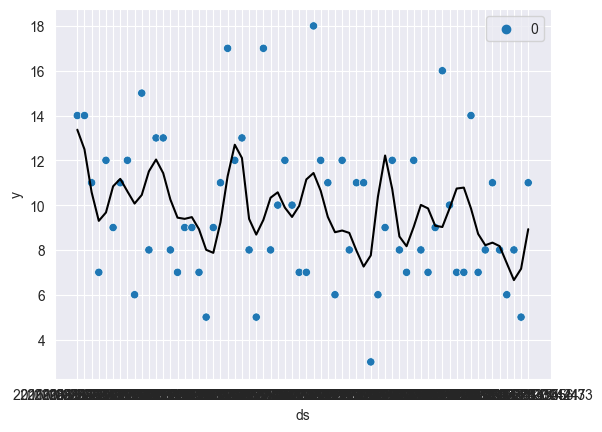

In [183]:
sns.scatterplot(x='ds', y='y', data=df, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=df, color='black')